In [13]:
%config InteractiveShell.ast_node_interactivity = 'all'
#import dependencies
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import scipy.stats as stats

In [14]:
df_venta = pd.read_csv('Venta.csv', sep=',')
df_venta.describe()

df_clientes = pd.read_csv('Clientes.csv', sep=';')
df_clientes.describe()

df_compra = pd.read_csv('Compra.csv', sep=',')
df_compra.describe()

df_gasto = pd.read_csv('Gasto.csv', sep=',')
df_gasto.describe()

df_proveedores = pd.read_csv('Proveedores.csv', sep=',',encoding = "Latin-1")
df_proveedores.describe()


df_localidades = pd.read_csv('Localidades.csv', sep=',')
df_localidades.describe()

df_sucursales = pd.read_csv('Sucursales.csv', sep=';')
df_sucursales.describe()
#Cargamos la data y realizamos un chequeo de outliners

,IdVenta,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
count,46645.000000,46645.000000,46645.000000,46645.000000,46645.000000,46645.000000,4.572100e+04,45753.000000
mean,23398.589624,2.016958,1502.721514,14.781927,2488.720956,42901.305585,5.835634e+03,2.385395
std,13590.352830,0.743113,972.521043,8.878188,960.499762,83.563413,2.498016e+05,3.547991
min,1.000000,1.000000,1.000000,1.000000,1011.000000,42737.000000,3.000000e+00,1.000000
25%,11662.000000,1.000000,692.000000,7.000000,1574.000000,42833.000000,4.380000e+02,2.000000
50%,23323.000000,2.000000,1360.000000,15.000000,2468.000000,42902.000000,6.536200e+02,2.000000
75%,34984.000000,3.000000,2273.000000,23.000000,3433.000000,42974.000000,1.789000e+03,3.000000
max,48241.000000,3.000000,3407.000000,31.000000,3979.000000,43043.000000,3.373920e+07,300.000000


,ID,Edad,col10
count,2672.000000,2672.000000,0.0
mean,1336.500000,40.203967,NaN
std,771.484284,14.611554,NaN
min,1.000000,15.000000,NaN
25%,668.750000,28.000000,NaN
50%,1336.500000,41.000000,NaN
75%,2004.250000,53.000000,NaN
max,2672.000000,65.000000,NaN


,IdCompra,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
count,11539.000000,11539.000000,11539.000000,11539.000000,11539.000000,11539.000000,1.117200e+04,11539.000000
mean,5770.000000,2017.671549,4.570500,201771.725366,42900.634890,8.826415,3.613647e+03,7.533928
std,3331.166713,1.770288,3.168731,177.830326,83.539532,6.412074,1.006630e+05,3.770609
min,1.000000,2015.000000,1.000000,201501.000000,42737.000000,1.000000,1.860000e+00,1.000000
25%,2885.500000,2016.000000,1.000000,201605.000000,42832.000000,4.000000,3.068300e+02,4.000000
50%,5770.000000,2018.000000,4.000000,201801.000000,42902.000000,7.000000,4.634850e+02,8.000000
75%,8654.500000,2019.000000,7.000000,201908.000000,42973.000000,12.000000,1.260322e+03,11.000000
max,11539.000000,2020.000000,12.000000,202012.000000,43043.000000,54.000000,1.044580e+07,14.000000


,IdGasto,IdSucursal,IdTipoGasto,Monto
count,8640.000000,8640.000000,8640.000000,8640.000000
mean,4320.500000,15.600000,2.500000,659.919324
std,2494.297496,8.815649,1.118099,448.630839
min,1.000000,1.000000,1.000000,100.000000
25%,2160.750000,8.000000,1.750000,255.022500
50%,4320.500000,15.500000,2.500000,679.990000
75%,6480.250000,23.000000,3.250000,1100.522500
max,8640.000000,31.000000,4.000000,1199.880000


,IDProveedor
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


,centroide_lat,centroide_lon,departamento_id,id,localidad_censal_id,municipio_id,provincia_id
count,4142.000000,4142.000000,4141.000000,4.142000e+03,4.142000e+03,3599.000000,4142.000000
mean,-32.142926,-62.992386,37894.094422,3.788550e+10,3.788481e+07,362413.327591,37.782714
std,4.788865,3.806946,29163.084284,2.916490e+10,2.916575e+07,287670.569116,29.201117
min,-54.803640,-72.891627,2007.000000,2.000010e+09,2.000010e+06,60007.000000,6.000000
25%,-34.747161,-65.550847,10070.000000,1.007012e+10,1.007012e+07,100028.000000,10.000000
50%,-32.161040,-63.338054,30084.000000,3.008412e+10,3.008412e+07,260056.000000,30.000000
75%,-28.461224,-59.942747,62091.000000,6.209108e+10,6.209108e+07,620150.500000,62.000000
max,-21.876490,-53.647213,94015.000000,9.401502e+10,9.401502e+07,942007.000000,94.000000


,ID
count,31.000000
mean,16.000000
std,9.092121
min,1.000000
25%,8.500000
50%,16.000000
75%,23.500000
max,31.000000


In [15]:
#Analizamos los que suponen ser un outlier y los graficamos para una mejor comprension
fig = px.scatter(df_venta, x="Cantidad", y="Precio", title="Outliner Venta")
fig.show()

fig = px.scatter(df_compra, x="Cantidad", y="Precio", title="Outliner Compra")
fig.show()

fig = px.scatter(df_gasto, x="IdTipoGasto", y="Monto", title="Outliner Gasto")
fig.show()

In [16]:
#Dropeo columnas innecesarias las cuales solo tenga toda la columna NaN

def drop_nan(df):
    df = df.dropna(axis=1, how='all')
    return df


df_compra= drop_nan(df_compra)
df_venta = drop_nan(df_venta)
df_clientes =drop_nan(df_clientes)
df_gasto =drop_nan(df_gasto)
df_proveedores= drop_nan(df_proveedores)
df_sucursales =drop_nan(df_sucursales)



#chequeamos los nan de nuestros dataframes sin outliers


print("La cantidad de NaN en proveedores es : %d" % df_proveedores.isnull().sum().sum())
print("La cantidad de NaN en sucursales es : %d" % df_sucursales.isnull().sum().sum())
print("La cantidad de NaN en clientes es : %d" % df_clientes.isnull().sum().sum())
print("La cantidad de NaN en gasto es : %d" % df_gasto.isnull().sum().sum())


#creo una lista ya que es mas sencillo para esta ocasion 

def incongruencias (df):
    total= df.count().sum()
    nan= df.isnull().sum().sum()
    return [total, nan]

plot_ready_gasto = incongruencias(df_gasto)
plot_ready_sucursales = incongruencias(df_sucursales)
plot_ready_clientes = incongruencias(df_clientes)
plot_ready_proveedores = incongruencias(df_proveedores)



La cantidad de NaN en proveedores es : 2
La cantidad de NaN en sucursales es : 0
La cantidad de NaN en clientes es : 267
La cantidad de NaN en gasto es : 0


In [17]:
#utilizacion del quantile para la busqueda de outliers usando las columnas en las cuales se encuentran

def find_outliers_IQR(df):

   q1=df.quantile(0.01)

   q3=df.quantile(0.99)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

def outliers_description(df_column):
    outliers = find_outliers_IQR(df_column)

    print("number of outliers: "+ str(len(outliers)))

    print("max outlier value: "+ str(outliers.max()))

    print("min outlier value: "+ str(outliers.min()))

    return outliers

outliers_description(df_venta["Precio"])
outliers_description(df_venta["Cantidad"])
outliers_description(df_compra["Precio"])
outliers_description(df_compra["Cantidad"])

number of outliers: 256
max outlier value: 33739200.0
min outlier value: 142340.0


131      201500.0
237      274900.0
533      155628.0
603      178900.0
814      154200.0
           ...   
44438    701162.0
44680    163724.0
44816    148900.0
46113    870364.0
46374    344500.0
Name: Precio, Length: 256, dtype: float64

number of outliers: 5
max outlier value: 300.0
min outlier value: 100.0


12972    100.0
15432    200.0
26078    200.0
37371    300.0
40733    200.0
Name: Cantidad, dtype: float64

number of outliers: 34
max outlier value: 10445800.0
min outlier value: 172482.0


37         175098.0
338        202554.0
951        305429.0
1261       176369.0
1533       222271.0
1686       184287.0
1688       172482.0
2391       192185.0
2681       188155.0
4230       189427.0
5344       292022.0
5400       183472.0
5975       177526.0
6267       215593.0
6507       434491.0
6721       172595.0
6805       577223.0
7019       222900.0
7338       298265.0
7414       580886.0
7613     10445800.0
8474       183588.0
8763       688826.0
8826       295283.0
9196       213334.0
9327       214566.0
9508       196645.0
10176      182732.0
10192      179912.0
10409      238386.0
10935      217593.0
11272      707004.0
11273      263483.0
11287      221878.0
Name: Precio, dtype: float64

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: Cantidad, dtype: int64)

In [18]:
def outliers_number(df_column):
    outliers = find_outliers_IQR(df_column)
    return len(outliers)

out_precio_venta= outliers_number(df_venta["Precio"])
out_cantidad_venta=outliers_number(df_venta["Cantidad"])
out_precio_compra= outliers_number(df_compra["Precio"])
out_cantidad_compra= outliers_number(df_compra["Precio"])

storage_out_total_compra=(out_precio_compra, out_cantidad_compra)
storage_out_total_venta= (out_precio_venta, out_cantidad_venta)

#out_total_venta= sum(storage_out_total_venta)
#out_total_compra= sum(storage_out_total_venta)
#sacamos el total de outliers

def not_nan_values(columna):
    return sum(columna.value_counts())

def nan_values(df_column):
    return df_column.isnull().sum()

def total_valor(column, outliers=0):
    total=[0]
    total.append(restar_values_out(not_nan_values(column), outliers))
    total.append(nan_values(column))
    total.append(outliers)
    return sum(total)

def restar_values_out(totalvalues,outliers):
    return (totalvalues - outliers) 

def contador(columna, outliers=0):
    valores_not_nan= restar_values_out(not_nan_values(columna), outliers)
    valores_nan= nan_values(columna)
    total_valores=total_valor(columna, outliers)
    return print("Hay %d valores correctos, %d valores vacios y %d outliers, teniendo un total de %d" % (valores_not_nan, valores_nan, outliers, total_valores))


#contador(df_venta['Precio'], out_precio_venta)
#df_venta.count()

#Hay 464373 valores correctos, 1816 valores vacios y 261 outliers, teniendo un total de 466711 
#Hay 45460 valores correctos, 1816 valores vacios y 261 outliers, teniendo un total de 46922
#Hay 45460 valores correctos, 1 valores vacios y 261 outliers, teniendo un total de 45107


In [19]:
#declaro una variable para hacer porcentaje los valores

def percentage(part, whole):
    porcentaje = round(100* float(part)/float(whole), 2)
    return porcentaje

def calculo_final(df_column, outlier_column):
    per_valoresd= percentage(restar_values_out(not_nan_values(df_column), outlier_column), total_valor(df_column, outlier_column))
    per_valoresn= percentage(nan_values(df_column), total_valor(df_column, outlier_column))
    per_outliers= percentage(outlier_column, total_valor(df_column, outlier_column))
    print(per_outliers+per_valoresd+per_valoresn)
    return (per_valoresd,per_valoresn,per_outliers)

#primero hago los plots que voy tienen outliers

precio_total_venta=calculo_final(df_venta['Precio'],out_precio_venta )
cantidad_total_venta=calculo_final(df_venta['Cantidad'],out_cantidad_venta )

precio_total_compra=calculo_final(df_compra['Precio'],out_precio_compra )
cantidad_total_compra=calculo_final(df_compra['Cantidad'],out_cantidad_compra )

#ahora hago los plots numbers percentages sin outliers, no llamo a calculo final ya que estoy trabajando con una lista
def valores_plot(list):
    ax1= percentage(list[0], sum(list))
    ax2= percentage(list[1], sum(list))
    return [ax1, ax2]


plot_gasto_ready= valores_plot(plot_ready_gasto)
plot_sucursales_ready = valores_plot(plot_ready_sucursales)
plot_proveedores_ready = valores_plot(plot_ready_proveedores)
plot_clientes_ready = valores_plot(plot_ready_clientes)

100.0
100.0
99.99000000000001
100.0


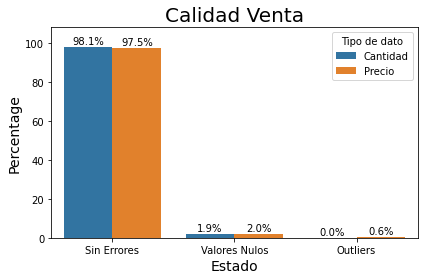

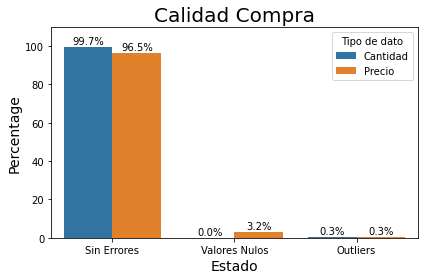

In [23]:


def dataframe_create(precio, cantidad):
    data= [{'Tipo de dato': "Cantidad", 'Cantidad': cantidad[0], 'Estado': "Sin Errores" },{'Tipo de dato': "Cantidad", 'Cantidad': cantidad[1], 'Estado': "Valores Nulos" },{'Tipo de dato': "Cantidad", 'Cantidad': cantidad[2], 'Estado': "Outliers"},
    {'Tipo de dato': "Precio", 'Cantidad': precio[0], 'Estado': "Sin Errores" },{'Tipo de dato': "Precio", 'Cantidad': precio[1], 'Estado': "Valores Nulos"},{'Tipo de dato': "Precio", 'Cantidad': precio[2], 'Estado': "Outliers"}]
    df1= pd.DataFrame(data)
    return df1


df1 = dataframe_create(precio_total_venta, cantidad_total_venta)
df2 = dataframe_create(precio_total_compra, cantidad_total_compra)
#ax = plt.barplot(x=df1.index, y=df1.Precio)


def ploteo_out(dataframe, name):

    ax = sb.barplot(x="Estado",y="Cantidad", hue="Tipo de dato", data=dataframe)
    #inserta nombre del archivo a comparar
    plt.title(name, fontsize=20)

    plt.xlabel('Estado', size=14)
    plt.ylabel('Percentage', size=14)

    for p in ax.patches:
        percentage = f'{100 * p.get_height() / 100:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.margins(y=0.1)
    plt.tight_layout()
    return plt.show()

ploteo_out(df1, input("Como se llama su archivo?"))
ploteo_out(df2, input("Como se llama su archivo?"))

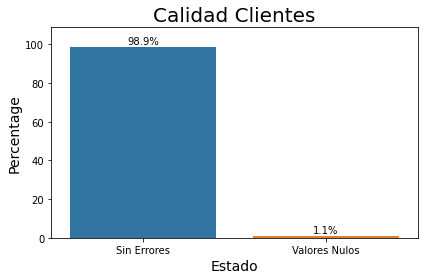

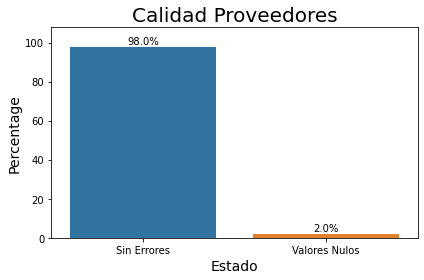

In [21]:
#ploteo de incongruencias de las tablas sin outliers
def dataframe_create_nan(lista):
    data= [{'Tipo de dato': "Cantidad", 'Cantidad': lista[0], 'Estado': "Sin Errores" },{'Tipo de dato': "Cantidad", 'Cantidad': lista[1], 'Estado': "Valores Nulos" }]
    df1=pd.DataFrame(data)
    return df1

df_clientes_plot = dataframe_create_nan(plot_clientes_ready)
df_proveedores_plot = dataframe_create_nan(plot_proveedores_ready)
df_sucursales_plot = dataframe_create_nan(plot_sucursales_ready)
df_gasto_plot = dataframe_create_nan(plot_gasto_ready)

#use una funcion diferente al ploteo anterior dado que este solo funciona solo que anteriormente solo hago el dataframe con 2 valores
def ploteo_nan(df, name):

    ax = sb.barplot(x="Estado",y="Cantidad", data= df)
    #inserta nombre del archivo a comparar
    plt.title(name, fontsize=20)

    plt.xlabel('Estado', size=14)
    plt.ylabel('Percentage', size=14)

    for p in ax.patches:
        percentage = f'{100 * p.get_height() / 100:.1f}%\n'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='center')
    plt.margins(y=0.1)
    plt.tight_layout()
    return plt.show()

#ploteamos nomas los que presentan valores nulos

ploteo_nan(df_clientes_plot, input("Como se llama su archivo?"))
ploteo_nan(df_proveedores_plot, input("Como se llama su archivo?"))


In [22]:
#para limpiar el codigo primero nos enfocamos en los outliers que teniamos en compra y ventas, dado que tienen un porcentaje bajo, los reemplazamos con un mean


def impute_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   upper = df[~(df>(q3+1.5*IQR))].max()

   lower = df[~(df<(q1-1.5*IQR))].min()

   df = np.where(df > upper,

       df.mean(),

       np.where(

           df < lower,

           df.mean(),

           df

           )

       )

   return df

df_venta.describe() 
df_venta["Precio"]=impute_outliers_IQR(df_venta["Precio"])
df_venta["Cantidad"]=impute_outliers_IQR(df_venta["Cantidad"])
df_compra["Precio"]=impute_outliers_IQR(df_compra["Precio"])
df_compra["Cantidad"]=impute_outliers_IQR(df_compra["Cantidad"])
df_venta.describe()


#chequeamos que efectivamente ya no hay rastro de outliers

outliers_description(df_venta["Precio"])
outliers_description(df_venta["Cantidad"])
outliers_description(df_compra["Precio"])
outliers_description(df_compra["Cantidad"])


,IdVenta,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
count,46645.000000,46645.000000,46645.000000,46645.000000,46645.000000,46645.000000,4.572100e+04,45753.000000
mean,23398.589624,2.016958,1502.721514,14.781927,2488.720956,42901.305585,5.835634e+03,2.385395
std,13590.352830,0.743113,972.521043,8.878188,960.499762,83.563413,2.498016e+05,3.547991
min,1.000000,1.000000,1.000000,1.000000,1011.000000,42737.000000,3.000000e+00,1.000000
25%,11662.000000,1.000000,692.000000,7.000000,1574.000000,42833.000000,4.380000e+02,2.000000
50%,23323.000000,2.000000,1360.000000,15.000000,2468.000000,42902.000000,6.536200e+02,2.000000
75%,34984.000000,3.000000,2273.000000,23.000000,3433.000000,42974.000000,1.789000e+03,3.000000
max,48241.000000,3.000000,3407.000000,31.000000,3979.000000,43043.000000,3.373920e+07,300.000000


,IdVenta,IdCanal,IdCliente,IdSucursal,IdEmpleado,IdProducto,Precio,Cantidad
count,46645.000000,46645.000000,46645.000000,46645.000000,46645.000000,46645.000000,45721.000000,45753.000000
mean,23398.589624,2.016958,1502.721514,14.781927,2488.720956,42901.305585,1324.641795,2.010729
std,13590.352830,0.743113,972.521043,8.878188,960.499762,83.563413,1408.970604,0.698012
min,1.000000,1.000000,1.000000,1.000000,1011.000000,42737.000000,3.000000,1.000000
25%,11662.000000,1.000000,692.000000,7.000000,1574.000000,42833.000000,438.000000,2.000000
50%,23323.000000,2.000000,1360.000000,15.000000,2468.000000,42902.000000,653.620000,2.000000
75%,34984.000000,3.000000,2273.000000,23.000000,3433.000000,42974.000000,1789.000000,2.385395
max,48241.000000,3.000000,3407.000000,31.000000,3979.000000,43043.000000,5835.633585,3.000000


number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: Precio, dtype: float64)

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: Cantidad, dtype: float64)

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: Precio, dtype: float64)

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: Cantidad, dtype: float64)

In [12]:
# dropeamos las columnas NaN las cuales solo posean precio, que no sean necesarias para un analisis de personas o localizaciones
# dado que el mayor % no supera el 3% y que algunos valores podrian ser 0, por lo tanto para trabajar con los datos en mejor calidad opto por eliminarlos

df_compra.describe()


df_compra=df_compra.dropna()
df_gasto=df_gasto.dropna()
df_venta=df_venta.dropna()


# verificamos que se haya dropeado las rows
df_compra.describe()

,IdCompra,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
count,11539.000000,11539.000000,11539.000000,11539.000000,11539.000000,11539.000000,11172.000000,11539.000000
mean,5770.000000,2017.671549,4.570500,201771.725366,42900.634890,7.902469,754.678826,7.533928
std,3331.166713,1.770288,3.168731,177.830326,83.539532,4.698936,638.758980,3.770609
min,1.000000,2015.000000,1.000000,201501.000000,42737.000000,1.000000,1.860000,1.000000
25%,2885.500000,2016.000000,1.000000,201605.000000,42832.000000,4.000000,306.830000,4.000000
50%,5770.000000,2018.000000,4.000000,201801.000000,42902.000000,7.000000,463.485000,8.000000
75%,8654.500000,2019.000000,7.000000,201908.000000,42973.000000,11.000000,1026.060000,11.000000
max,11539.000000,2020.000000,12.000000,202012.000000,43043.000000,21.000000,2690.390000,14.000000


,IdCompra,Fecha_Año,Fecha_Mes,Fecha_Periodo,IdProducto,Cantidad,Precio,IdProveedor
count,11172.000000,11172.000000,11172.000000,11172.000000,11172.000000,11172.000000,11172.000000,11172.000000
mean,5763.593179,2017.668725,4.565879,201771.438417,42900.807107,7.901357,754.678826,7.546097
std,3330.202922,1.769831,3.167150,177.782128,83.562445,4.708868,638.758980,3.769346
min,1.000000,2015.000000,1.000000,201501.000000,42737.000000,1.000000,1.860000,1.000000
25%,2874.750000,2016.000000,1.000000,201605.000000,42832.000000,4.000000,306.830000,4.000000
50%,5758.500000,2018.000000,4.000000,201801.000000,42902.000000,7.000000,463.485000,8.000000
75%,8648.250000,2019.000000,7.000000,201908.000000,42973.000000,11.000000,1026.060000,11.000000
max,11539.000000,2020.000000,12.000000,202012.000000,43043.000000,21.000000,2690.390000,14.000000


In [ ]:
#procedemos a hacer los kpi para el reporte, vamos a analizar 3 puntos de vista clave para el negocio

# primero veremos las 5 sucursales con mas ventas, contra las 5 con menos ventas

# despues procederemos a hacer las 5 sucursales con mas gasto, contra las 5 con menos gasto

# por ultimo vamos a hacer las 5 sucursales con mas gastos cuales son sus ventas

#diccionario